# TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report




# DATASET COLLECTION

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA PREPROCESS

In [4]:
print("Data Shape (rows, columns):", df.shape)


Data Shape (rows, columns): (891, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Name, Ticket, Cabin, PassengerId not needed for prediction
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [9]:
# Handle Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle Embarked
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\sivas\AppData\Local\Temp\ipykernel_15756\3893214402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\sivas\AppData\Local\Temp\ipykernel_15756\3893214402.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.replace({'Sex':{'male':0,'female':1},
            'Embarked':{'S':0,'C':1,'Q':2}},
              inplace=True)

C:\Users\sivas\AppData\Local\Temp\ipykernel_15756\440497986.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0,'female':1},


In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


# DATA ANALYSIS

<Figure size 800x500 with 0 Axes>

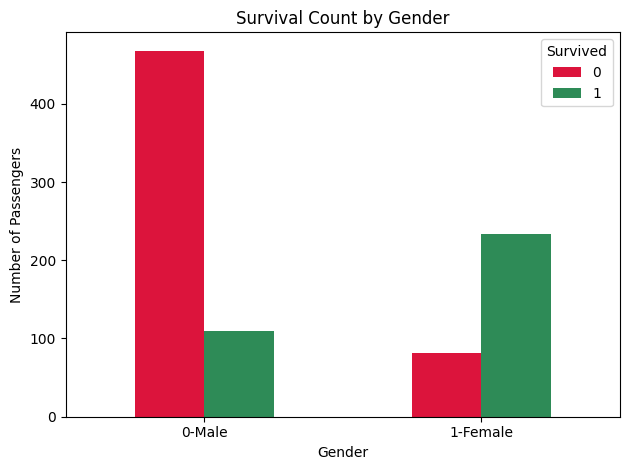

In [21]:

plt.figure(figsize=(8, 5))
survival_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()

survival_by_sex.plot(kind='bar', stacked=False, color=['crimson', 'seagreen'])
plt.xticks([0,1],['0-Male','1-Female'])

plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["0", "1"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

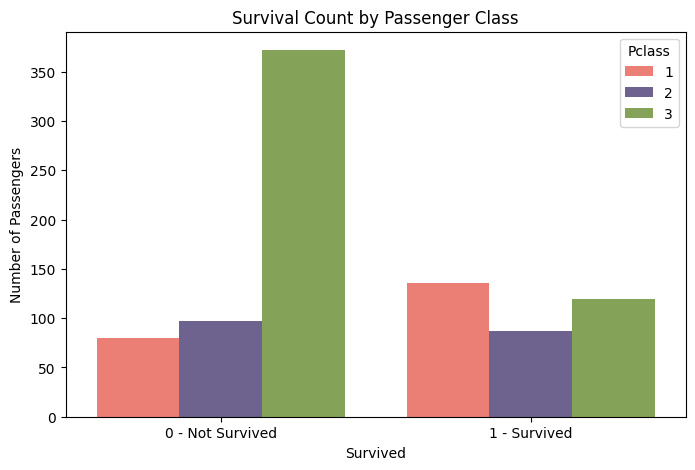

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', hue='Pclass',
              palette={1: '#FF6F61', 2: '#6B5B95', 3: '#88B04B'})

plt.xticks([0, 1], ['0 - Not Survived', '1 - Survived'])


plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')

plt.show()

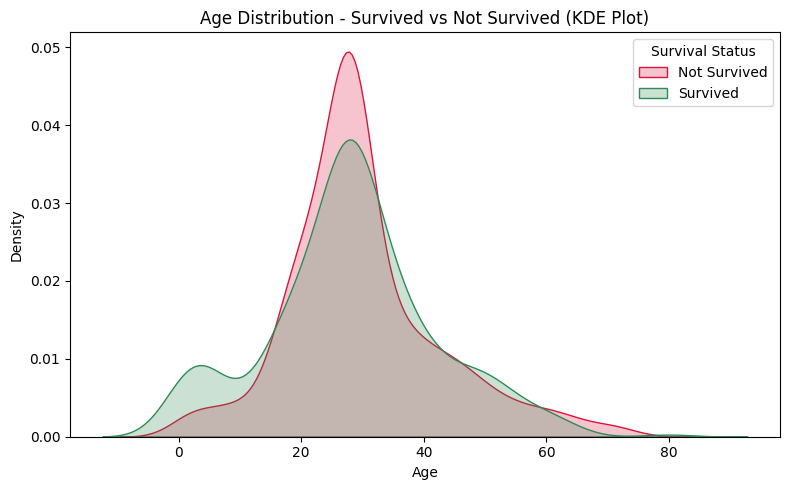

In [15]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', color='crimson', fill=True)
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', color='seagreen', fill=True)


plt.title('Age Distribution - Survived vs Not Survived (KDE Plot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()

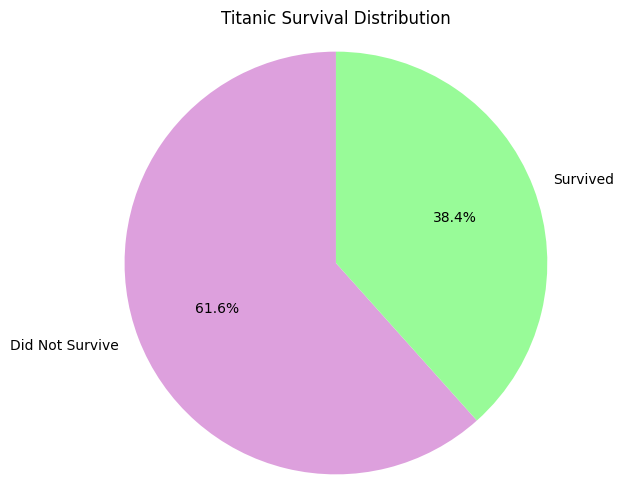

In [22]:


survival_counts = df['Survived'].value_counts()
labels = ['Did Not Survive', 'Survived']

colors =['plum','palegreen']


# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    survival_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Titanic Survival Distribution')
plt.axis('equal')
plt.show()


 # Model Training 

In [23]:
x=df[['Sex','Pclass']]
y=df[['Survived']]
x_train,x_text,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=LogisticRegression()
model.fit(x_train,y_train)


d:\codsoft\s_env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
y_prediction=model.predict(x_text)
y_prediction
y_test

,Survived
495,0
648,0
278,0
31,1
255,1
...,...
780,1
837,0
215,1
833,0


 # MODEL PERFORMANCE

In [24]:
#Accuracy 
print("Accuracy:",accuracy_score(y_test,y_prediction))
#Confusion matrics 
print("Confusion_matrix:",confusion_matrix(y_test,y_prediction))
#Classification report
print("classification_report:",classification_report(y_test,y_prediction))


Accuracy: 0.7877094972067039
Confusion_matrix: [[92 18]
 [20 49]]
classification_report:               precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



#  MODEL TESTING

   Sex  Pclass
0    1       1
Passanger Survived


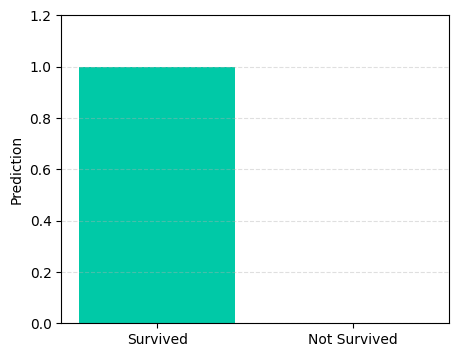

In [25]:
#user input

sex=int(input("Enter Gender(0-male/1-female):"))
pclass=int(input("Enter Passanger Class(1=First,2=Second,3=Third):"))


user_data=pd.DataFrame({'Sex':[sex],'Pclass':[pclass]})
prediction=model.predict(user_data)[0]
print(user_data)

#result

if prediction==1:
    print("Passanger Survived")
else:
    print("Passanger Did Not Survived")
import matplotlib.pyplot as plt

#  plot
plt.figure(figsize=(5, 4))

plt.bar(['Survived'], [prediction == 1], color='#00c9a7')
plt.bar(['Not Survived'], [prediction == 0], color='#ff6b6b' )
plt.ylabel("Prediction")
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()
